In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('std.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df['average']=df[['math score','reading score','writing score']].mean(axis=1)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [7]:
def grade(row):
    if row['average'] >= 90:
        return 'A'
    elif row['average'] >= 80:
        return 'B'
    elif row['average'] >= 70:
        return 'C'
    elif row['average'] >= 60:
        return 'D'
    else:
        return 'F'

In [8]:
df['Grade']=df.apply(grade, axis=1)

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average                      1000 non-null   float64
 9   Grade                        1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


In [11]:
df['average']=df['average'].astype('int')

In [12]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
average                         int64
Grade                          object
dtype: object

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72,C
1,female,group C,some college,standard,completed,69,90,88,82,B
2,female,group B,master's degree,standard,none,90,95,93,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,F
4,male,group C,some college,standard,none,76,78,75,76,C


In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average                        0
Grade                          0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(1000, 10)

In [18]:
df.size

10000

In [19]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average', 'Grade'],
      dtype='object')

In [20]:
df.columns = df.columns.str.strip()

In [21]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [22]:
cat_vars=df.select_dtypes(include=['object']).columns
num_vars=df.select_dtypes(exclude=['object']).columns

In [23]:
cat_vars

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'Grade'],
      dtype='object')

In [24]:
num_vars

Index(['math score', 'reading score', 'writing score', 'average'], dtype='object')

In [25]:
print('the categorical variables are {}: which are:{}'.format(len(cat_vars), cat_vars))

the categorical variables are 6: which are:Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'Grade'],
      dtype='object')


In [26]:
print('the unique value in the {},are:{}'.format(cat_vars[0], df[cat_vars[0]].unique()))
print('the unique value in the {},are:{}'.format(cat_vars[1], df[cat_vars[1]].unique()))
print('the unique value in the {},are:{}'.format(cat_vars[2], df[cat_vars[2]].unique()))
print('the unique value in the {},are:{}'.format(cat_vars[3], df[cat_vars[3]].unique()))
print('the unique value in the {},are:{}'.format(cat_vars[4], df[cat_vars[4]].unique()))
print('the unique value in the {},are:{}'.format(cat_vars[5], df[cat_vars[5]].unique()))

the unique value in the gender,are:['female' 'male']
the unique value in the race/ethnicity,are:['group B' 'group C' 'group A' 'group D' 'group E']
the unique value in the parental level of education,are:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the unique value in the lunch,are:['standard' 'free/reduced']
the unique value in the test preparation course,are:['none' 'completed']
the unique value in the Grade,are:['C' 'B' 'A' 'F' 'D']


In [27]:
for col in cat_vars:
    print('the unique value in the {},are:{}'.format(col, df[col].unique()))

the unique value in the gender,are:['female' 'male']
the unique value in the race/ethnicity,are:['group B' 'group C' 'group A' 'group D' 'group E']
the unique value in the parental level of education,are:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the unique value in the lunch,are:['standard' 'free/reduced']
the unique value in the test preparation course,are:['none' 'completed']
the unique value in the Grade,are:['C' 'B' 'A' 'F' 'D']


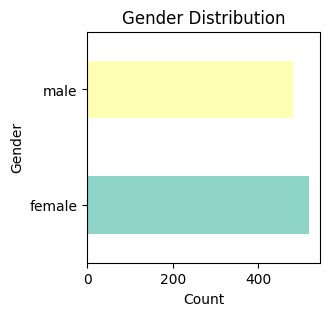

In [28]:
df['gender'].value_counts().plot(kind='barh', figsize=(3, 3), color=sns.color_palette('Set3'))
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

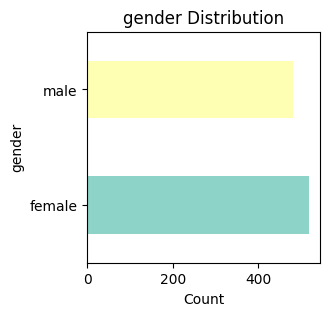

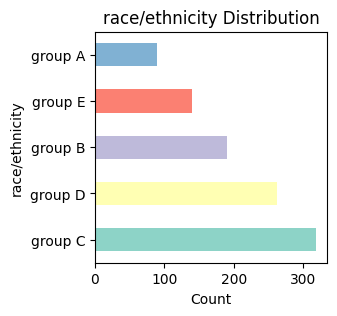

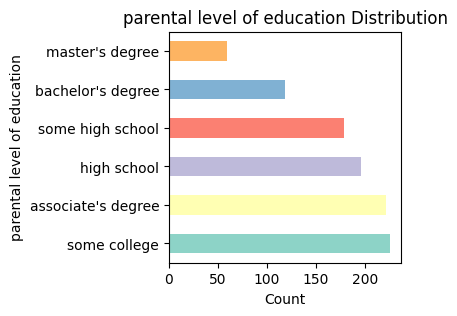

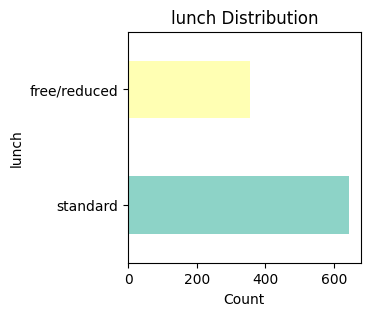

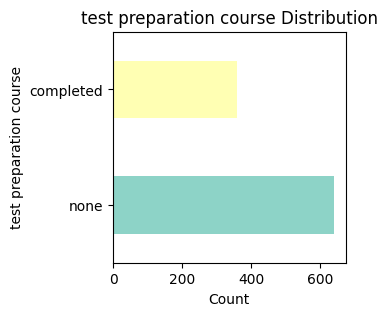

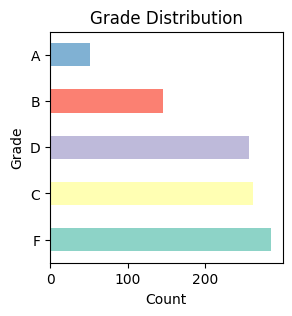

In [29]:
for col in cat_vars:
    df[col].value_counts().plot(kind='barh', figsize=(3, 3), color=sns.color_palette('Set3'))
    plt.title(f'{col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/1627583714.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')


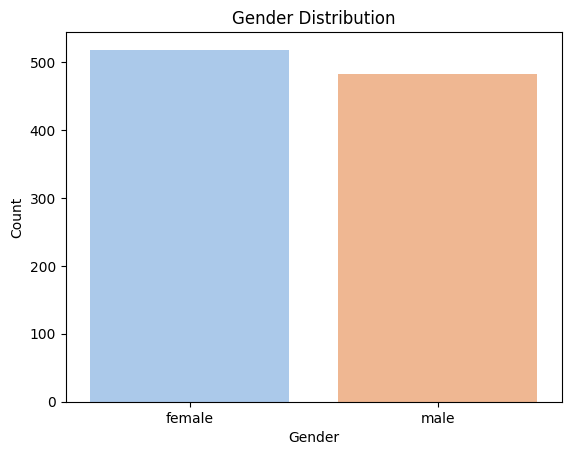

In [30]:
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks()
plt.show()

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/3747934396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


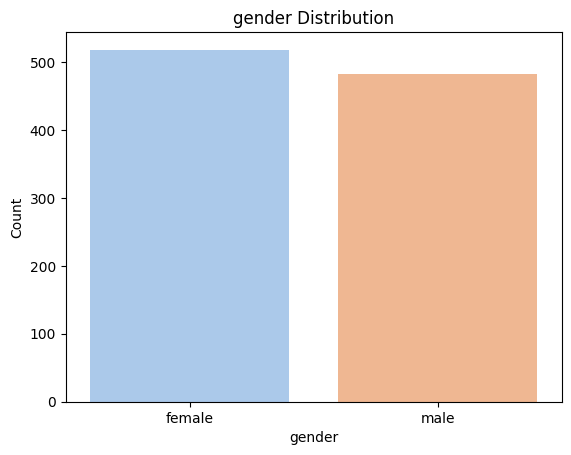

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/3747934396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


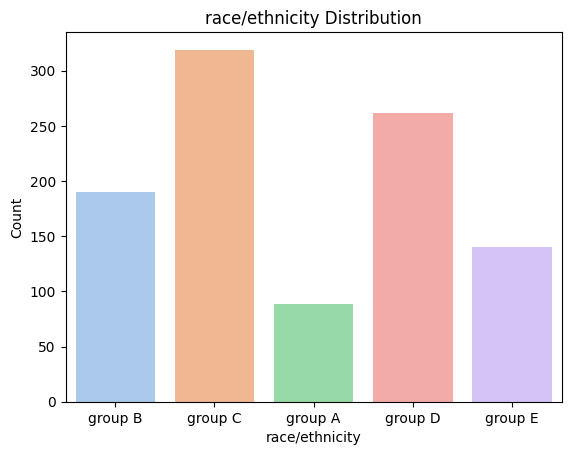

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/3747934396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


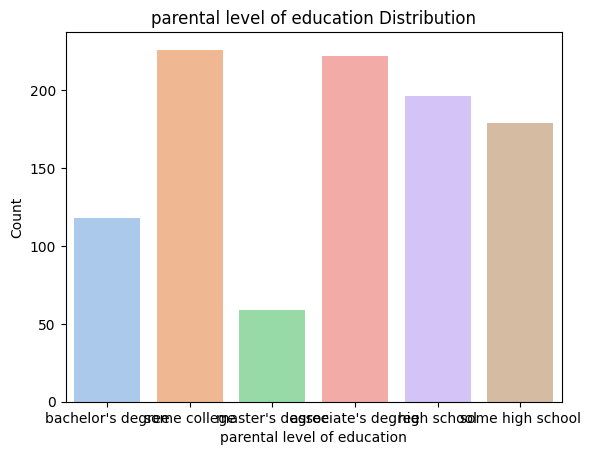

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/3747934396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


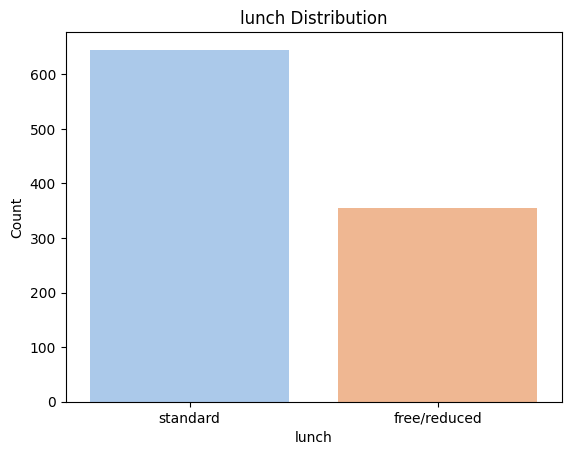

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/3747934396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


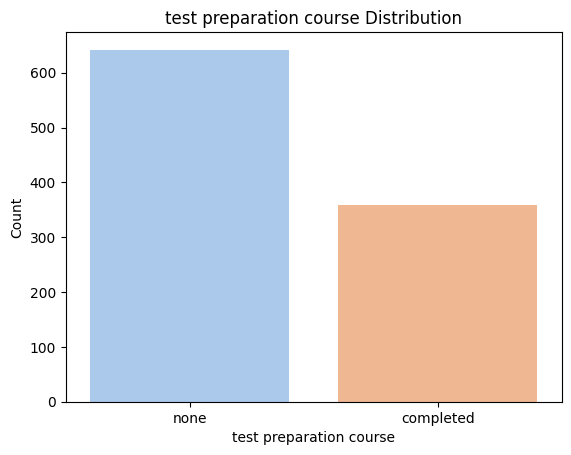

/var/folders/n_/g88mnl_s56v5z09yc47dbrf40000gn/T/ipykernel_2071/3747934396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


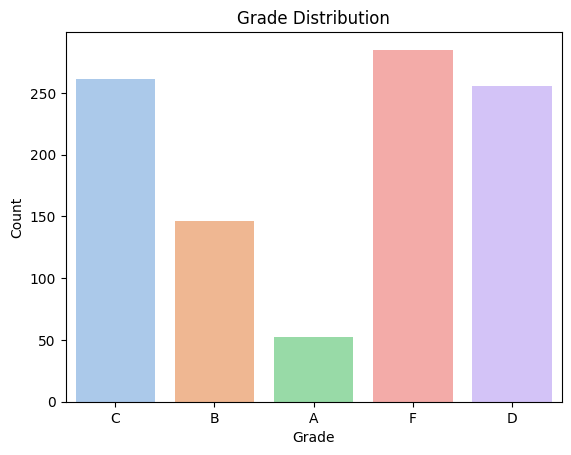

In [32]:
for col in cat_vars:
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks()
    plt.show()  

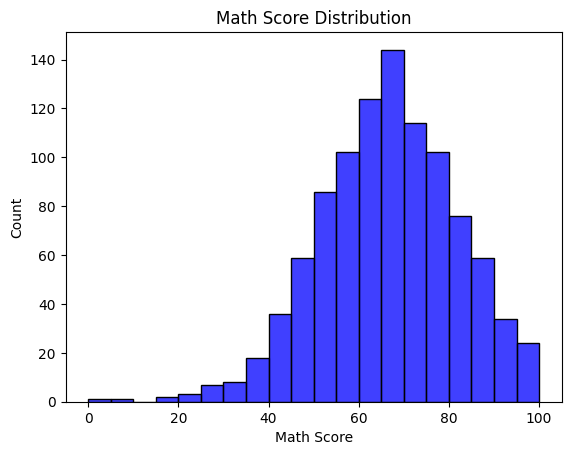

In [33]:
sns.histplot(df['math score'], bins=20, kde=False, color='blue')
plt.title('Math Score Distribution')
plt.xlabel('Math Score')    
plt.ylabel('Count')     
plt.show()

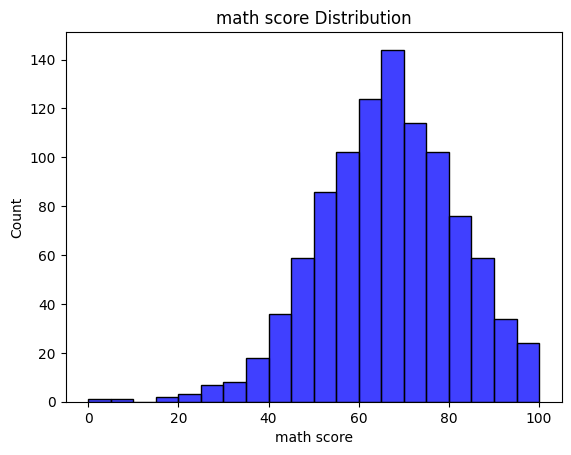

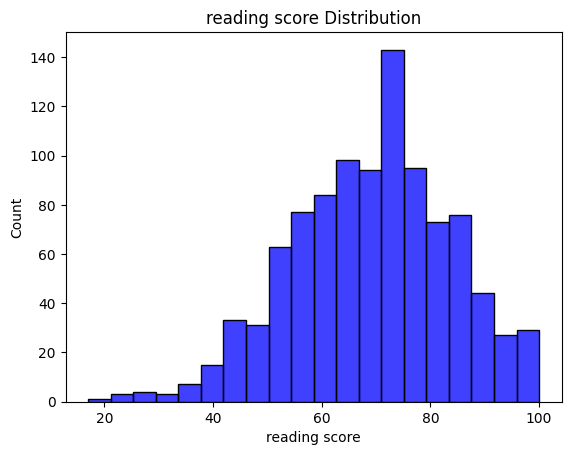

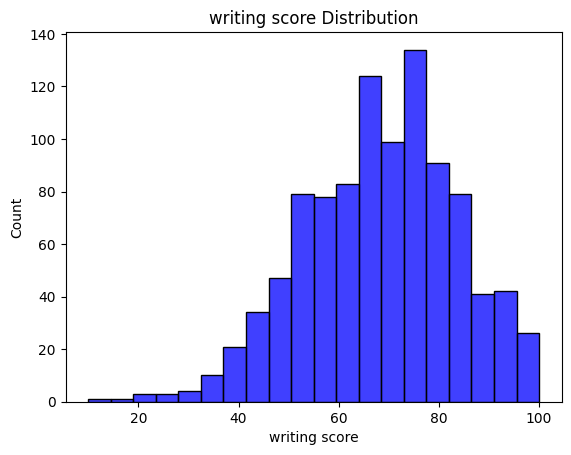

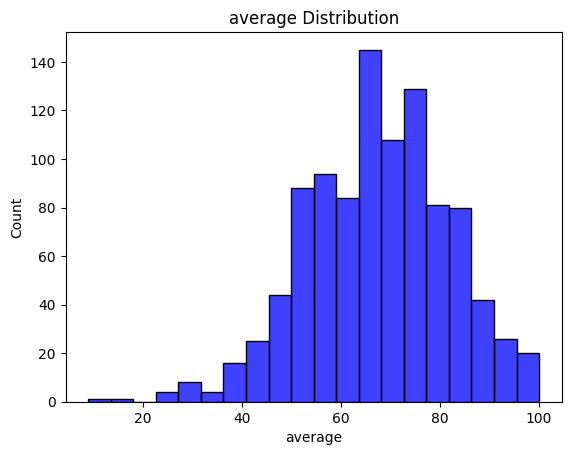

In [34]:
for col in num_vars:
    sns.histplot(df[col], bins=20, kde=False, color='blue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<Axes: xlabel='gender,Grade'>

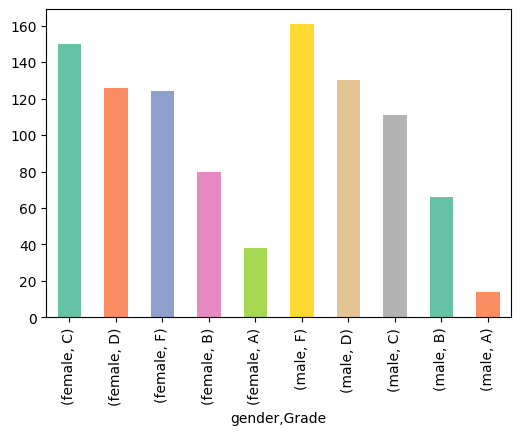

In [40]:
# bivariate analysis categorical vs categorical
df.groupby('gender')['Grade'].value_counts().plot(kind='bar', figsize=(6, 4), color=sns.color_palette('Set2'))

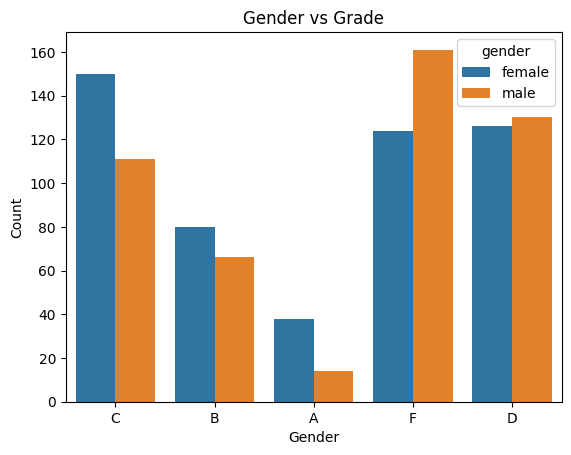

In [42]:
# bivariate analysis catgorical vs vscategorical
sns.countplot(x='Grade', hue='gender', data=df)
plt.title('Gender vs Grade')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

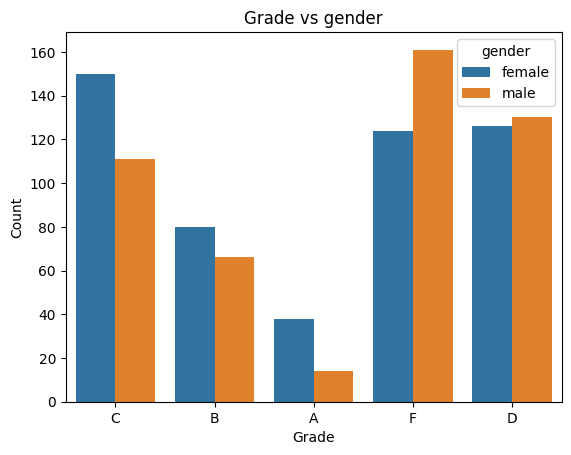

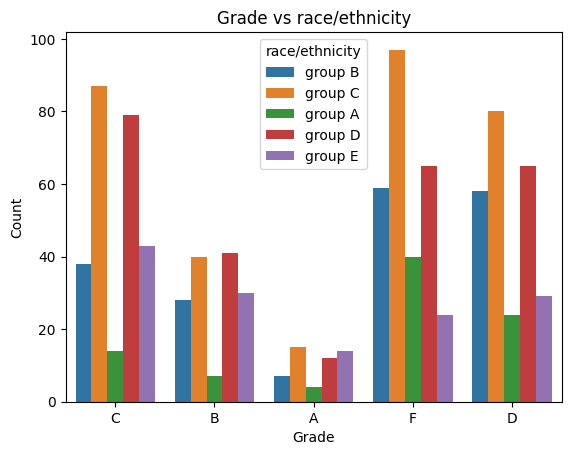

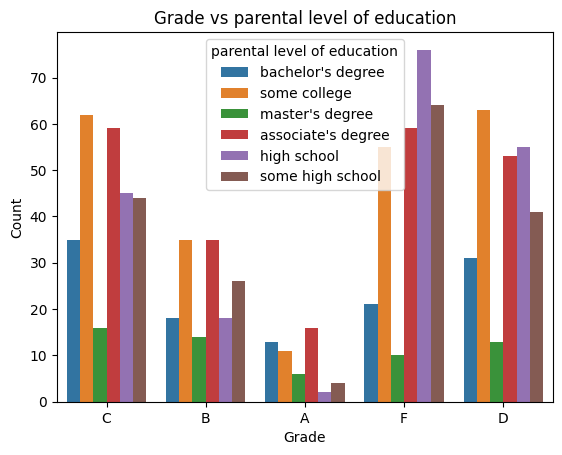

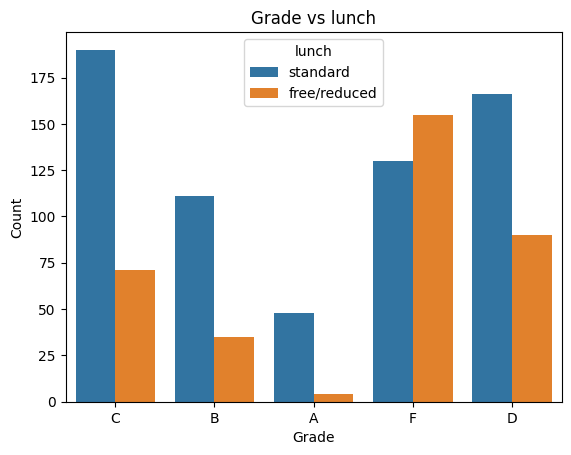

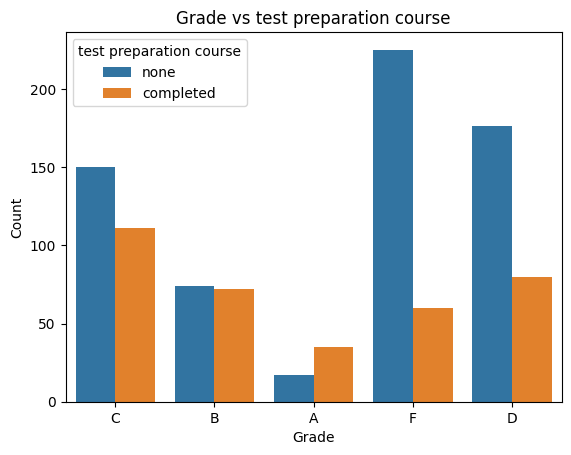

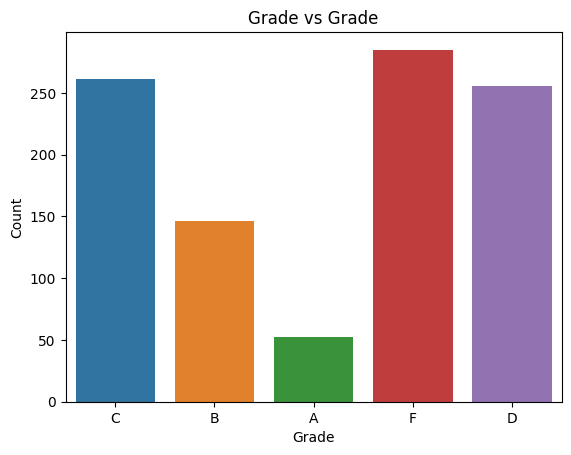

In [44]:
for col in cat_vars:
    sns.countplot(x='Grade', hue=col, data=df)
    plt.title(f'Grade vs {col}')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()

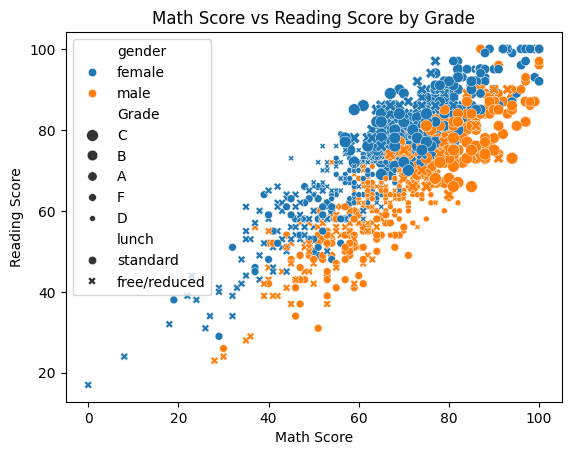

In [51]:
# bivariate analysis numeric vs numeric
sns.scatterplot(x='math score', y='reading score', hue='gender', data=df,size='Grade',style='lunch')
plt.title('Math Score vs Reading Score by Grade')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

<Axes: xlabel='gender', ylabel='average'>

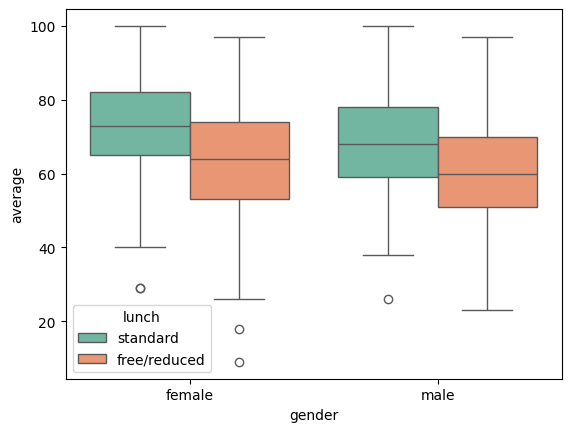

In [55]:
# bivariate analysis numerical vs categorical
sns.boxplot(x='gender',y='average',data=df, palette='Set2',hue='lunch')

In [ ]:
# heatmap
